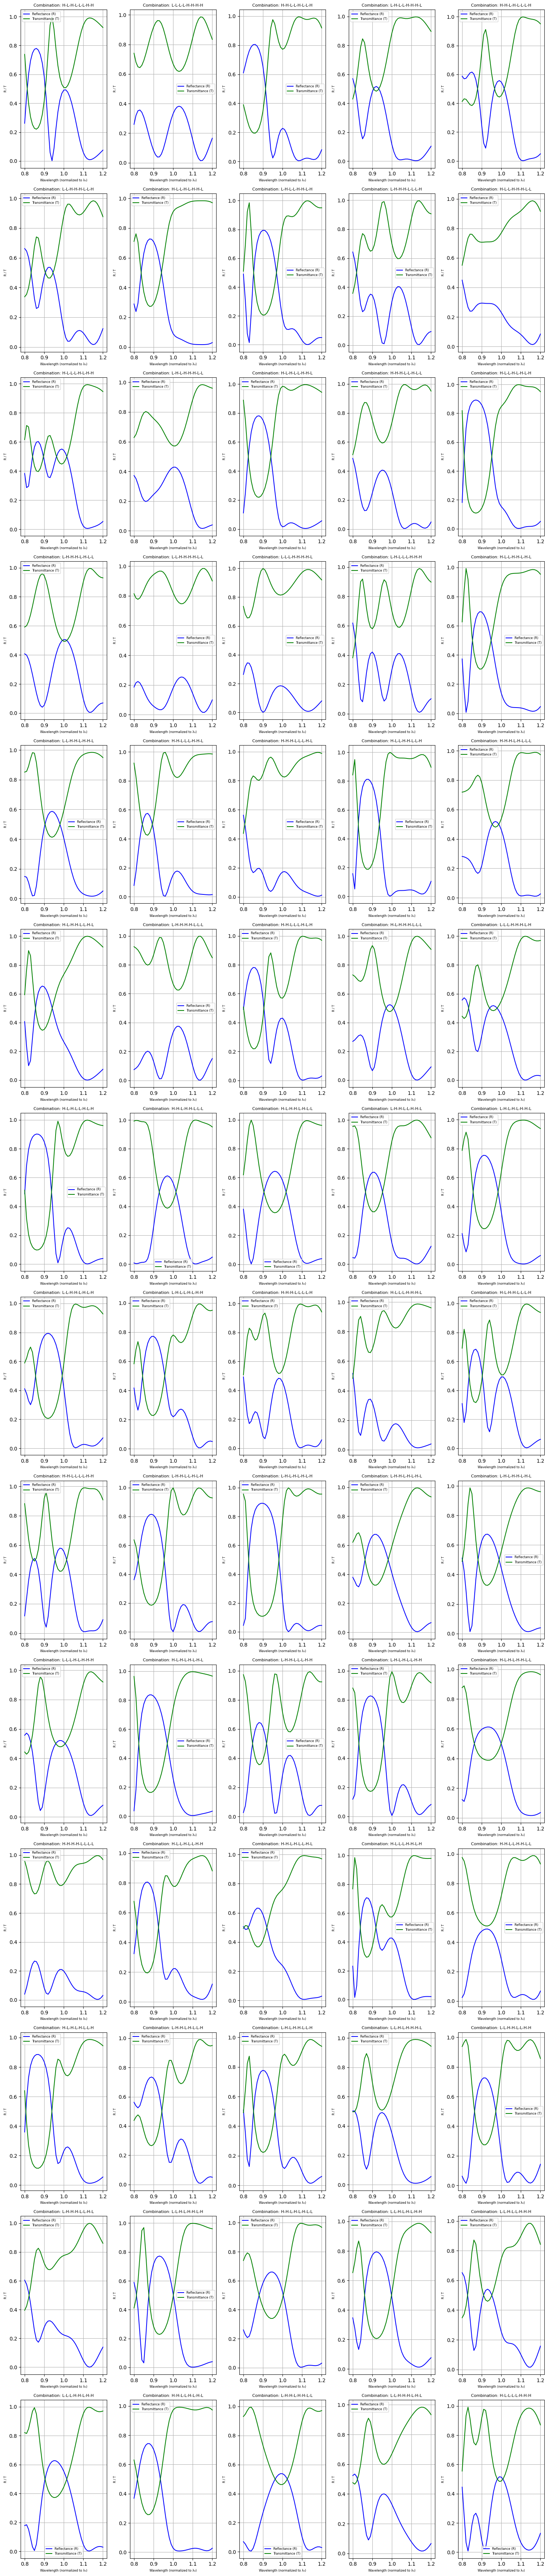

(('L', 'H', 'L', 'H', 'L', 'H', 'L', 'H'),
 0.3494677146872357,
 ('H', 'H', 'H', 'H', 'L', 'L', 'L', 'L'),
 0.10910899428030484)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# Constants
n_H = 2.3  # Refractive index of ZnS (high index)
n_L = 1.35  # Refractive index of MgF2 (low index)
n_glass = 1.5  # Refractive index of glass substrate
n_air = 1  # Refractive index of air (external medium)

# Wavelength range (normalized to lambda_0)
lambda_min = 0.8
lambda_max = 1.2
lambda_step = 0.01
wavelengths = np.arange(lambda_min, lambda_max + lambda_step, lambda_step)

# Calculate phase shifts for each layer (dependent on wavelength)
def phase_shift(n, wavelength, lambda_0=1.0):
    return (2 * np.pi * n / wavelength) * (lambda_0 / 4)

# Characteristic matrix for a single layer
def layer_matrix(n, delta):
    return np.array([[np.cos(delta), (1j / n) * np.sin(delta)],
                     [1j * n * np.sin(delta), np.cos(delta)]])

# Total transfer matrix calculation for a given combination
def total_matrix_combination(wavelength, combination):
    M_total = np.eye(2)  # Identity matrix as a starting point
    for layer in combination:
        if layer == 'H':
            delta = phase_shift(n_H, wavelength)
            M_layer = layer_matrix(n_H, delta)
        else:
            delta = phase_shift(n_L, wavelength)
            M_layer = layer_matrix(n_L, delta)
        M_total = np.dot(M_layer, M_total)
    return M_total

# Reflectance and transmittance calculation for a given combination
def reflectance_transmittance_combination(wavelength, combination):
    M = total_matrix_combination(wavelength, combination)
    
    A, B = M[0, 0], M[0, 1]
    C, D = M[1, 0], M[1, 1]
    
    numerator_r = (n_air * A + n_air * n_glass * B - C - n_glass * D)
    denominator_r = (n_air * A + n_air * n_glass * B + C + n_glass * D)
    reflectance = np.abs(numerator_r / denominator_r) ** 2
    
    numerator_t = 4 * n_air * n_glass
    denominator_t = np.abs(n_air * A + n_air * n_glass * B + C + n_glass * D) ** 2
    transmittance = numerator_t / denominator_t
    
    return reflectance, transmittance

# Generate all distinct combinations of 4 ZnS (H) and 4 MgF2 (L) layers
materials = ['H'] * 4 + ['L'] * 4  # 'H' for ZnS, 'L' for MgF2
combinations = set(permutations(materials))  # Get all unique permutations

# Convert to a list to ensure a fixed order
combinations = list(combinations)

# Plot graphs for each combination
plt.figure(figsize=(15, 70))  # Adjust figure size to fit all subplots

for i, combo in enumerate(combinations, 1):
    reflectance_spectrum_combo = []
    transmittance_spectrum_combo = []

    # Calculate reflectance and transmittance for each wavelength
    for wavelength in wavelengths:
        R, T = reflectance_transmittance_combination(wavelength, combo)
        reflectance_spectrum_combo.append(R)
        transmittance_spectrum_combo.append(T)

    # Plot the reflectance and transmittance for this combination
    plt.subplot(14, 5, i)  # Create a 14x5 grid (since there are 70 plots)
    plt.plot(wavelengths, reflectance_spectrum_combo, label="Reflectance (R)", color='blue')
    plt.plot(wavelengths, transmittance_spectrum_combo, label="Transmittance (T)", color='green')
    plt.title(f"Combination: {'-'.join(combo)}", fontsize=8)
    plt.xlabel("Wavelength (normalized to λ₀)", fontsize=6)
    plt.ylabel("R / T", fontsize=6)
    plt.legend(fontsize=6)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate average reflectance for each combination
average_reflectance = []

for combo in combinations:
    reflectance_spectrum_combo = []
    
    # Calculate reflectance for each wavelength
    for wavelength in wavelengths:
        R, T = reflectance_transmittance_combination(wavelength, combo)
        reflectance_spectrum_combo.append(R)
    
    # Calculate the average reflectance for this combination
    avg_reflectance = np.mean(reflectance_spectrum_combo)
    average_reflectance.append(avg_reflectance)

# Find the combination with the highest and smallest average reflectance
max_reflectance_idx = np.argmax(average_reflectance)
min_reflectance_idx = np.argmin(average_reflectance)

highest_reflectance_combo = combinations[max_reflectance_idx]
smallest_reflectance_combo = combinations[min_reflectance_idx]

highest_reflectance_avg = average_reflectance[max_reflectance_idx]
smallest_reflectance_avg = average_reflectance[min_reflectance_idx]

highest_reflectance_combo, highest_reflectance_avg, smallest_reflectance_combo, smallest_reflectance_avg

